# Telcom Churn prection to predict when customer leave the network

 To begin with, let us try to understand the base of any data science project. There are several methodologies using which we can go about our data science lifecycle -- CRISP-DM (CRoss Industry Standard Process for Data Mining) , SEMMA (Sample, Explore, Modify, Model, and Assess) etc. We shall use the former because it has an edge over the others in that, it starts from understanding the business requirements, understanding the data, and only then will we proceed to the other phases. Frameworks like SEMMA on the other hand, takes a leap to the data sampling, skipping the initial business, and data understanding part, and largely focuses on the technical steps of data mining.


### Understanding the CRISP-DM model

CRISP-DM, which stands for Cross-Industry Standard Process for Data Mining, is an industry-proven way to guide your 
data mining efforts.

*As a methodology*, it includes descriptions of the typical phases of a project, the tasks involved with each phase, and an 
explanation of the relationships between these tasks.

*As a process model*, CRISP-DM provides an overview of the data mining life cycle.

It has six sequential phases:

1. Business understanding – What does the business need?
2. Data understanding – What data do we have / need? Is it clean?
3. Data preparation – How do we organize the data for modeling?
4. Modeling – What modeling techniques should we apply?
5. Evaluation – Which model best meets the business objectives?
6. Deployment – How do stakeholders access the results?

## Project Overview

In this example, we take IBM's Telecom churn dataset from Kaggle. The basic steps for any data science project is as follows:

Step 1: Problem Definition

Step 2: Data Collection

Step 3: Data Preparation

Step 4: Exploratory Data Analysis (EDA)

Step 5: Feature Engineering

Step 6: Train/Test Split

Step 7: Model Evaluation Metrics Definition

Step 8: Model Selection, Training, Prediction and Assessment

### 1. Understanding our business problem -- What is Telco customer churn prediction?

For Telco companies it is key to attract new customers and at the same time avoid contract terminations (=churn) to grow their revenue generating base. Looking at churn, different reasons trigger customers to terminate their contracts, for example better price offers, more interesting packages, bad service experiences or change of customers’ personal situations.

Churn analytics provides valuable capabilities to predict customer churn and also define the underlying reasons that drive it. The churn metric is mostly shown as the percentage of customers that cancel a product or service within a given period (mostly months). 

Telcos apply machine learning models to predict churn on an individual customer basis and take counter measures such as discounts, special offers or other gratifications to keep their customers. A customer churn analysis is a typical classification problem within the domain of supervised learning.


### Importing all packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### 2. Data Collection -- Reading the dataset for the given problem

In [4]:
telecom_churn_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

### To get the number of rows and columns of the dataframe

In [5]:
telecom_churn_data.shape

(7043, 21)

We see that, our dataframe has 7043 rows and 21 columns

### To know what are the features that make up our problem

In [ ]:
telecom_churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Let us make the column names even with title case

In [ ]:
cols = telecom_churn_data.columns.str.title()
telecom_churn_data.columns = cols
print(telecom_churn_data.columns)

Index(['Customerid', 'Gender', 'Seniorcitizen', 'Partner', 'Dependents',
       'Tenure', 'Phoneservice', 'Multiplelines', 'Internetservice',
       'Onlinesecurity', 'Onlinebackup', 'Deviceprotection', 'Techsupport',
       'Streamingtv', 'Streamingmovies', 'Contract', 'Paperlessbilling',
       'Paymentmethod', 'Monthlycharges', 'Totalcharges', 'Churn'],
      dtype='object')


### To peek at the first five rows and last five rows of our dataframe

In [ ]:
telecom_churn_data.head()

,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,...,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telecom_churn_data.tail()

,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,...,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### To get basic information of our dataframe

In [ ]:
telecom_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Getting statistical insight

In [ ]:
telecom_churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Overview of datatypes of each columns in the dataframe

In [ ]:
telecom_churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### To see specific datatypes of columns -

In [ ]:
telecom_churn_data.select_dtypes(include=['int', 'float']).head()

,Seniorcitizen,Tenure,Monthlycharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


We observe that Totalcharges is not of numeric datatype-- int or float. So, let's change it

In [ ]:
telecom_churn_data['Totalcharges'] = pd.to_numeric(telecom_churn_data['Totalcharges'], errors='coerce')
print((telecom_churn_data['Totalcharges']).dtypes)

float64


### To see the values for each of our features

In [ ]:
for col in telecom_churn_data:
    print(col, telecom_churn_data[col].unique())

### To count of the number of entries in each column of the dataframe

In [ ]:
telecom_churn_data.count()

Customerid          7043
Gender              7043
Seniorcitizen       7043
Partner             7043
Dependents          7043
Tenure              7043
Phoneservice        7043
Multiplelines       7043
Internetservice     7043
Onlinesecurity      7043
Onlinebackup        7043
Deviceprotection    7043
Techsupport         7043
Streamingtv         7043
Streamingmovies     7043
Contract            7043
Paperlessbilling    7043
Paymentmethod       7043
Monthlycharges      7043
Totalcharges        7032
Churn               7043
dtype: int64

## 2. Data preparation

Data Preparation is also called Data Cleaning or Data Wrangling. In this process we prepare the data by cleaning the data

### Checking dataframe for missing or null values

What is NaN values?

In [ ]:
telecom_churn_data.isna().sum()

Customerid           0
Gender               0
Seniorcitizen        0
Partner              0
Dependents           0
Tenure               0
Phoneservice         0
Multiplelines        0
Internetservice      0
Onlinesecurity       0
Onlinebackup         0
Deviceprotection     0
Techsupport          0
Streamingtv          0
Streamingmovies      0
Contract             0
Paperlessbilling     0
Paymentmethod        0
Monthlycharges       0
Totalcharges        11
Churn                0
dtype: int64

In [ ]:
null_data = (telecom_churn_data.isnull().sum())
null_data.sort_values()

Customerid           0
Monthlycharges       0
Paymentmethod        0
Paperlessbilling     0
Contract             0
Streamingmovies      0
Streamingtv          0
Techsupport          0
Deviceprotection     0
Onlinebackup         0
Internetservice      0
Multiplelines        0
Phoneservice         0
Tenure               0
Dependents           0
Partner              0
Seniorcitizen        0
Gender               0
Onlinesecurity       0
Churn                0
Totalcharges        11
dtype: int64

Pandas treat None and NaN as essentially interchangeable for indicating missing or null values.

From this, we observe that there are 11 null values in our dataframe

### Handling missing values

There are so many ways by which we can handle missing values. It totally depends on how many values are missing across the different rows. Parameters for considering while handling values are

Replace it with a constant value. This can be a good approach when used in discussion with the domain expert for the data we are dealing with.

Replace it with the mean or median. This is a decent approach when the data size is small—but it does add bias.

Replace it with values by using information from other columns.

here let us just drop as we have only few rows

In [ ]:
telecom_churn_data = telecom_churn_data.dropna()

let us see if we have removed the rows with missing values. we do this because it is neglible

In [ ]:
telecom_churn_data.shape

(7032, 21)

## Data Visualization

### Univariate Analysis

Male      3555
Female    3488
Name: gender, dtype: int64


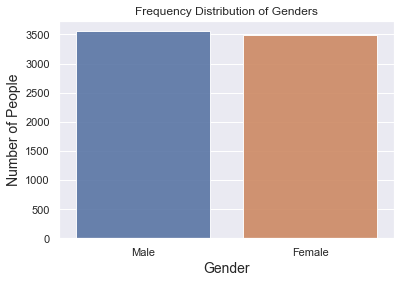

In [ ]:
gender_count = telecom_churn_data['gender'].value_counts()
print(gender_count)
sns.set(style="darkgrid")
sns.barplot(gender_count.index, gender_count.values, alpha=0.9)
plt.title('Frequency Distribution of Genders')
plt.ylabel('Number of People', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.show()

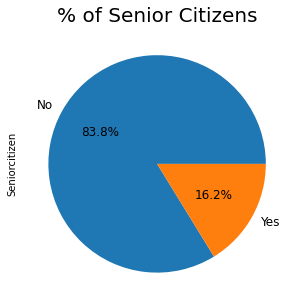

In [ ]:
ax = (telecom_churn_data['Seniorcitizen'].value_counts(normalize=True)*100.0)\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 20);
print(telecom_churn_data['SeniorCitizen'].value_counts())

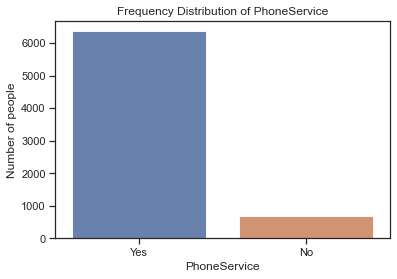

In [ ]:
PhoneService = telecom_churn_data['PhoneService'].value_counts()
sns.set(style="ticks")
sns.barplot(PhoneService.index, PhoneService.values, alpha=0.9)
plt.title('Frequency Distribution of PhoneService')
plt.ylabel('Number of people', fontsize=12)
plt.xlabel('PhoneService', fontsize=12)
plt.show()

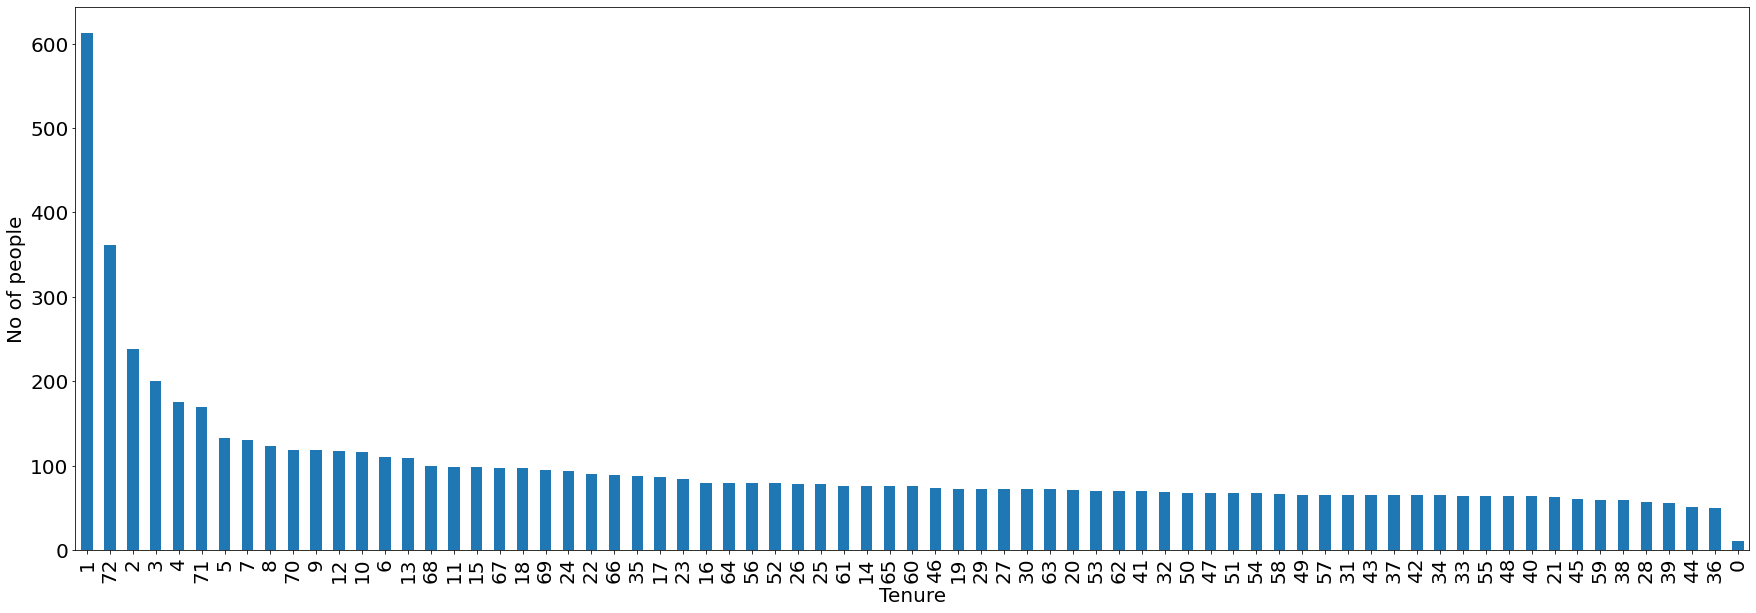

In [ ]:
telecom_churn_data['Tenure'].value_counts().plot(kind='bar', figsize=(30,10))
plt.xlabel('Tenure',fontsize=20)
plt.ylabel('No of people',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

from this we observe that people with one period tenure are the maximum

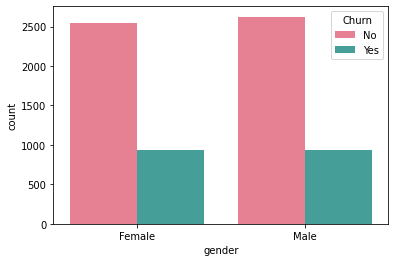

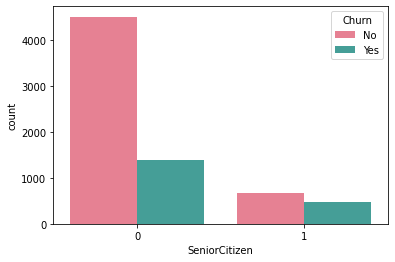

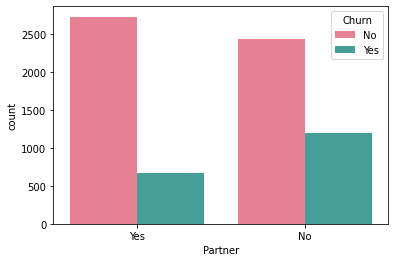

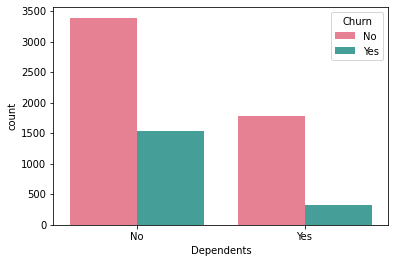

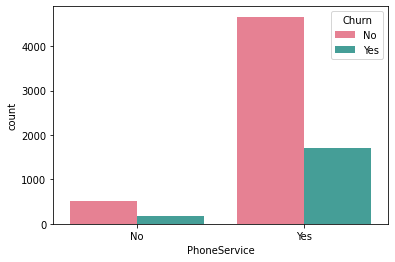

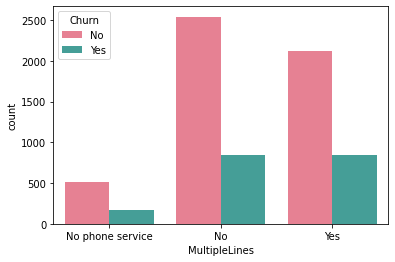

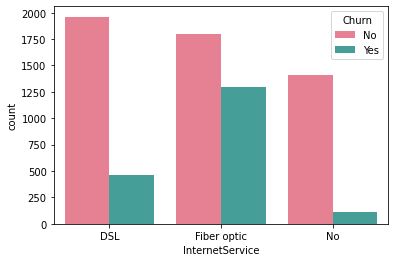

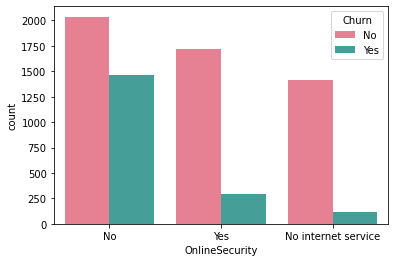

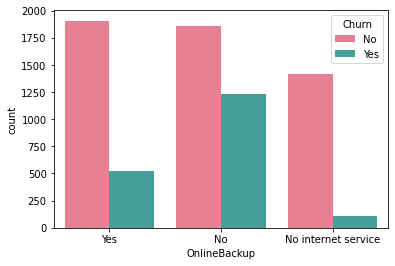

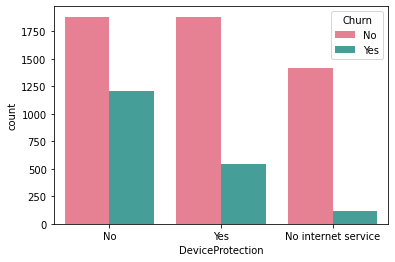

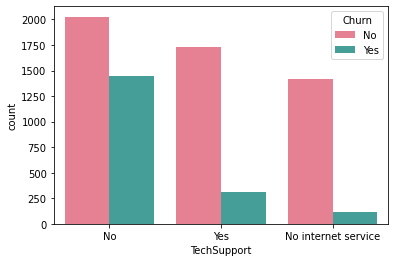

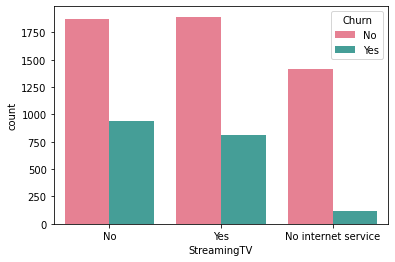

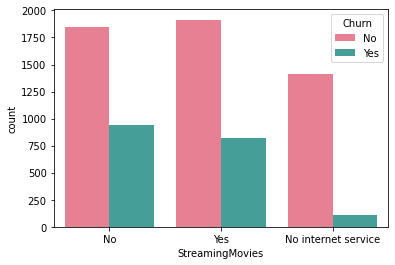

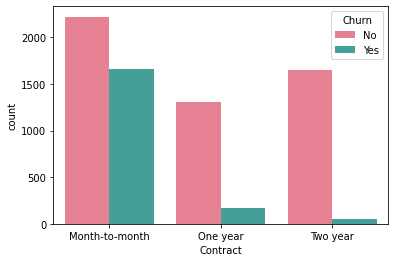

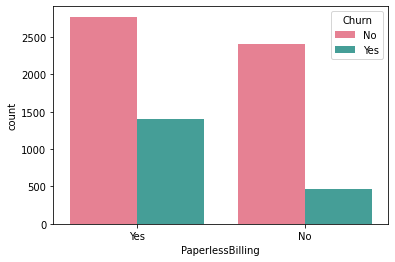

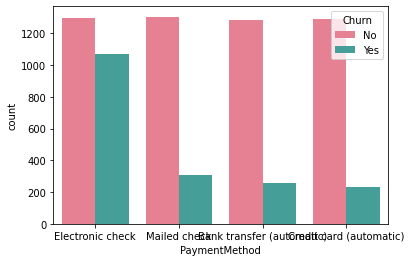

In [ ]:
cols = telecom_churn_data.drop(["Churn",'customerID', 'MonthlyCharges', 'TotalCharges', 'tenure'], axis="columns").columns
for i in cols:
  plt.figure(i)
  sns.countplot(x =i, hue = "Churn", data = telecom_churn_data,palette="husl")

### Correlation between columns in our dataframe

In [ ]:
matrix = telecom_churn_data.corr()
print(matrix)
# plt.matshow(matrix)
# plt.show()

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102411
tenure               0.016567  1.000000        0.247900      0.825880
MonthlyCharges       0.220173  0.247900        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000


The corr() method returns a table containing numerous integers that illustrate the strength of the relationship between the two columns.

The value ranges between -1 and 1.

In this data set, every time a value increased in the first column, it also increased in the second, resulting in a correlation coefficient of 1, or a perfect 1 to 1 association.

0.9 is a favourable association as well, and if you raise one value, it's likely that the other will rise as well.

A connection of -0.9 would be just as beneficial as one of 0.9, but if you raise one value, the other is likely to fall.
If one value increases, it does not necessarily follow that the other will, because the link is not favourable at 0.2.

### Showing the correlation through heatmap

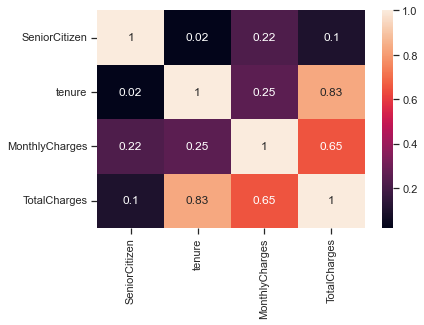

In [ ]:
matrix = telecom_churn_data.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

We see that tenure and totalcharges have a good correlation, while the others do not have a very good correlation. The features that have the number 1, which makes sense because each column has a perfect relationship with itself.

### Bivariate and Multivariate Analysis

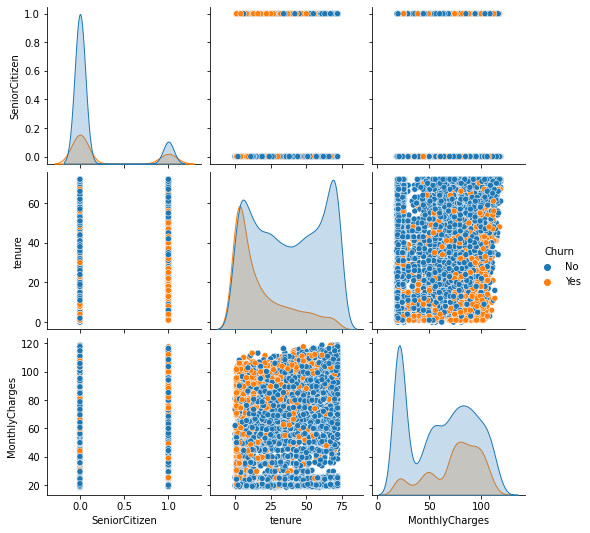

In [ ]:
sns.pairplot(telecom_churn_data, hue='Churn')
plt.show()

CONCLUSION

We infer that other than gender, all other features have an impact of the churn. 

Tenure and Monthly Charges have a strong correlation with each other.
